<a href="https://colab.research.google.com/github/sujiraa/BasicProg_DataViz65/blob/main/DataViz02_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCA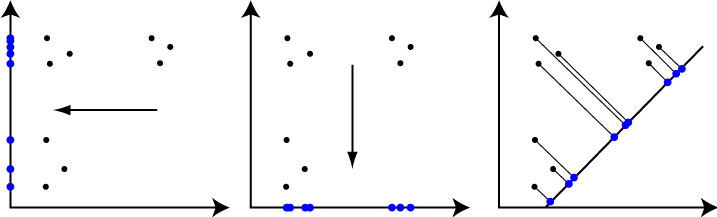
เมื่อมี ตัวแปร ที่จะนำมาแสดงการกระจายของข้อมูลมากกว่า 2 ตัวแปร สามารถใช้ PCA (Principle Component Analysis) เพื่อลดจำนวนตัวแปรลงมาได้โดยรักษาลักษณะการกระจายของข้อมูลได้มากที่สุด

In [1]:
import pandas as pd

In [2]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10,10] #ขนาด

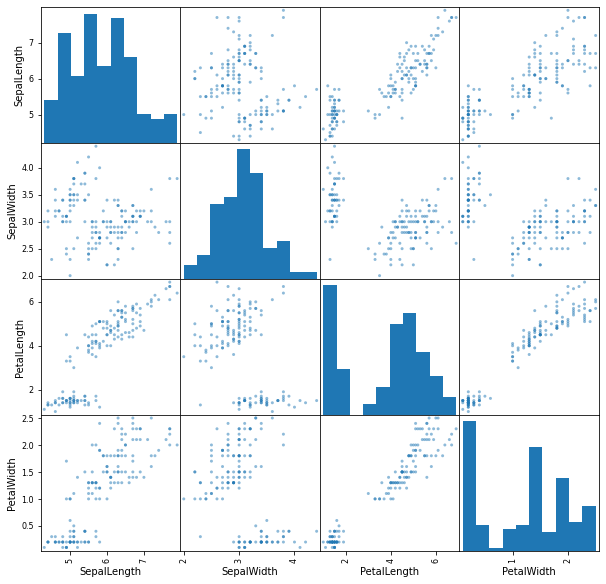

In [4]:
pd.plotting.scatter_matrix(example_df); #ดูการกระจายเเบบคร่าวๆ

เริ่มทำ PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA()

In [7]:
thisdata = example_df.iloc[:,:-1]
thisdata

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
new_axis = pca.fit_transform(thisdata)

In [9]:
new_axis.shape

(150, 4)

In [10]:
new_axis

array([[-2.68420713e+00,  3.26607315e-01, -2.15118370e-02,
         1.00615724e-03],
       [-2.71539062e+00, -1.69556848e-01, -2.03521425e-01,
         9.96024240e-02],
       [-2.88981954e+00, -1.37345610e-01,  2.47092410e-02,
         1.93045428e-02],
       [-2.74643720e+00, -3.11124316e-01,  3.76719753e-02,
        -7.59552741e-02],
       [-2.72859298e+00,  3.33924564e-01,  9.62296998e-02,
        -6.31287327e-02],
       [-2.27989736e+00,  7.47782713e-01,  1.74325619e-01,
        -2.71468037e-02],
       [-2.82089068e+00, -8.21045110e-02,  2.64251085e-01,
        -5.00996251e-02],
       [-2.62648199e+00,  1.70405349e-01, -1.58015103e-02,
        -4.62817610e-02],
       [-2.88795857e+00, -5.70798026e-01,  2.73354061e-02,
        -2.66154143e-02],
       [-2.67384469e+00, -1.06691704e-01, -1.91533300e-01,
        -5.58909660e-02],
       [-2.50652679e+00,  6.51935014e-01, -6.92749958e-02,
        -1.66082478e-02],
       [-2.61314272e+00,  2.15206320e-02,  1.07650353e-01,
      

In [11]:
PCAdf = pd.DataFrame.from_records(new_axis, columns = ['PCA1','PCA2','PCA3','PCA4'])
PCAdf

,PCA1,PCA2,PCA3,PCA4
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129
...,...,...,...,...
145,1.944017,0.187415,0.179303,0.425082
146,1.525664,-0.375021,-0.120636,0.255723
147,1.764046,0.078519,0.130784,0.136295
148,1.901629,0.115877,0.722874,0.040873


In [12]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

#plot PCA data

In [13]:
from matplotlib import pyplot as plt

In [14]:
example_df2 = example_df.replace({'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'})

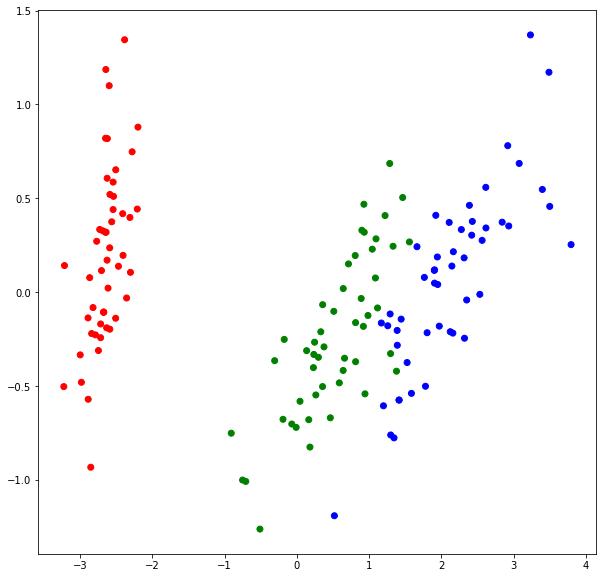

In [15]:
plt.scatter(PCAdf['PCA1'],PCAdf['PCA2'],c=example_df2['Name'])

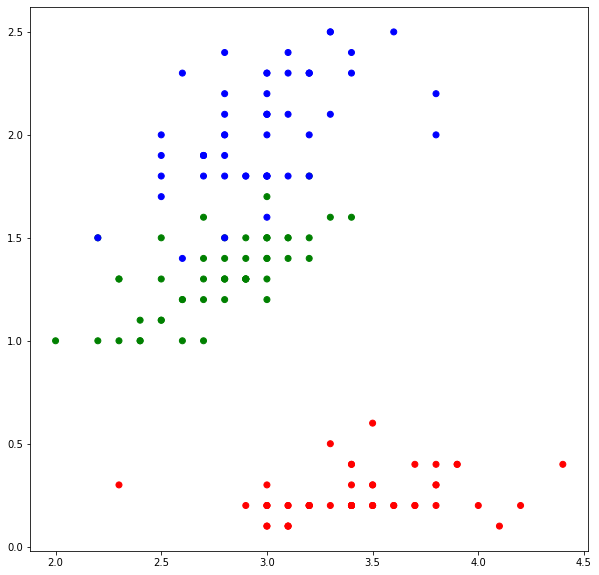

In [16]:
plt.scatter(example_df2['SepalWidth'],example_df2['PetalWidth'],c=example_df2['Name'])

##เปรียบเทียบ ข้อมูล ด้วย coordinate plot

In [17]:
sample_data = example_df.groupby('Name').mean()

In [18]:
sample_data

,SepalLength,SepalWidth,PetalLength,PetalWidth
Name,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [19]:
sample_data.iloc[0,:]

SepalLength    5.006
SepalWidth     3.418
PetalLength    1.464
PetalWidth     0.244
Name: Iris-setosa, dtype: float64

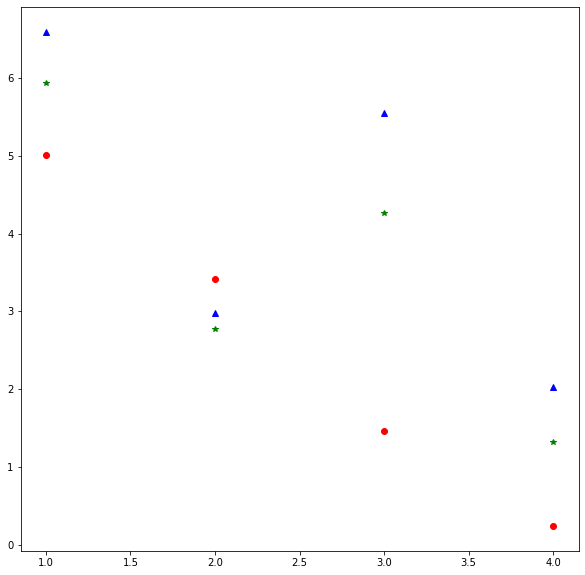

In [20]:
plt.plot([1,2,3,4],sample_data.iloc[0,:],'ro')
plt.plot([1,2,3,4],sample_data.iloc[1,:],'g*')
plt.plot([1,2,3,4],sample_data.iloc[2,:],'b^')

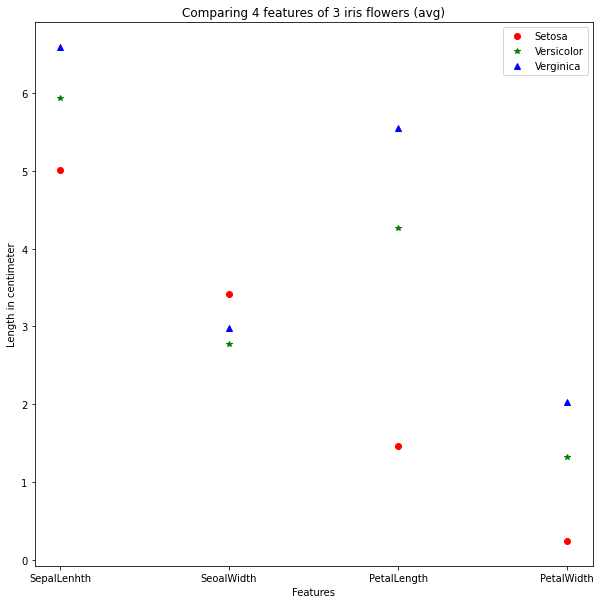

In [21]:
plt.plot([1,2,3,4],sample_data.iloc[0,:],'ro' ,label= 'Setosa')
plt.plot([1,2,3,4],sample_data.iloc[1,:],'g*' ,label= 'Versicolor')
plt.plot([1,2,3,4],sample_data.iloc[2,:],'b^' ,label= 'Verginica')
plt.title('Comparing 4 features of 3 iris flowers (avg)');
plt.xlabel('Features')
plt.ylabel('Length in centimeter')
plt.xticks([1,2,3,4],['SepalLenhth','SeoalWidth','PetalLength','PetalWidth']);
plt.legend()

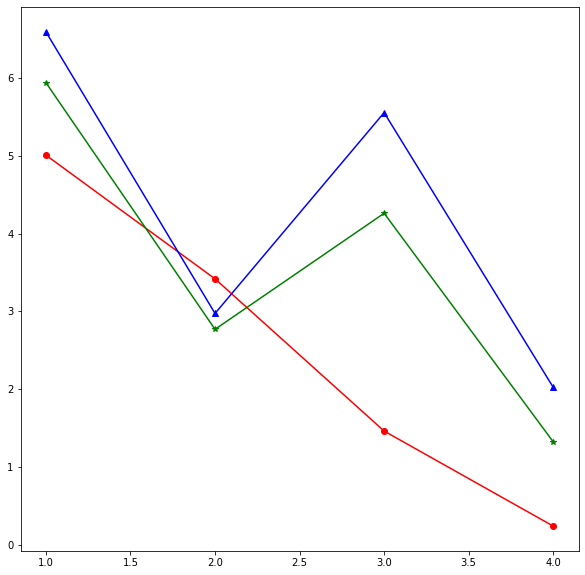

In [22]:
plt.plot([1,2,3,4],sample_data.iloc[0,:],'ro-')
plt.plot([1,2,3,4],sample_data.iloc[1,:],'g*-')
plt.plot([1,2,3,4],sample_data.iloc[2,:],'b^-') #ไม่ควรทำเพราะ ถ้าเชื่อม ควรมีความเชื่อมโยงกัน

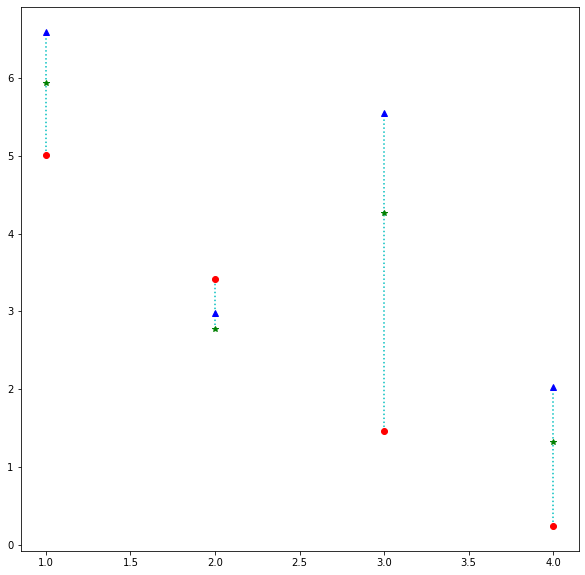

In [23]:
plt.plot([1,1],[min(sample_data.iloc[:,0]),max(sample_data.iloc[:,0])],'c:')
plt.plot([2,2],[min(sample_data.iloc[:,1]),max(sample_data.iloc[:,1])],'c:')
plt.plot([3,3],[min(sample_data.iloc[:,2]),max(sample_data.iloc[:,2])],'c:')
plt.plot([4,4],[min(sample_data.iloc[:,3]),max(sample_data.iloc[:,3])],'c:')

plt.plot([1,2,3,4],sample_data.iloc[0,:],'ro')
plt.plot([1,2,3,4],sample_data.iloc[1,:],'g*')
plt.plot([1,2,3,4],sample_data.iloc[2,:],'b^')

#การใช้ plt.plot
plt.plot(พิกัดแกน X, พิกัดแกน Y, ลักษณะของ marker + เส้นเชื่อม)

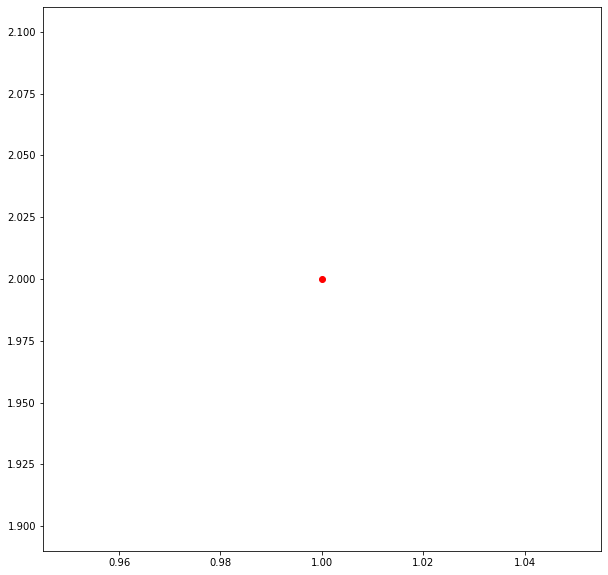

In [24]:
plt.plot([1],[2],'ro')

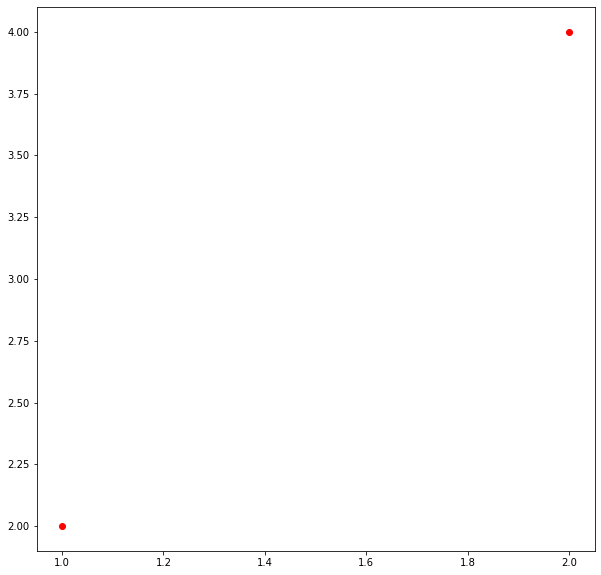

In [25]:
plt.plot([1,2],[2,4],'ro')

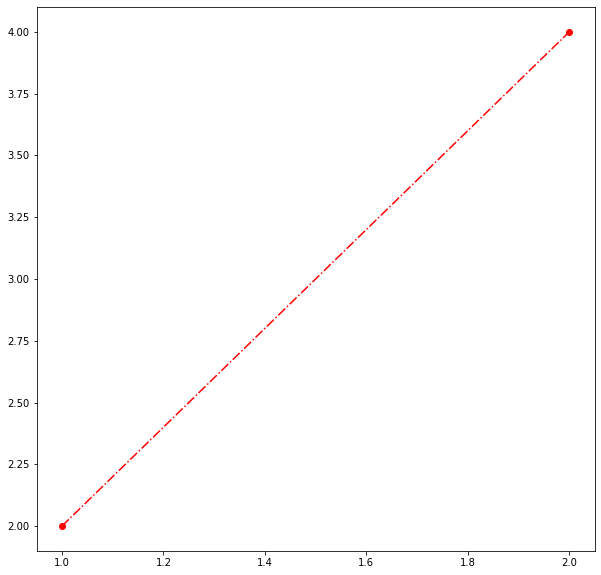

In [26]:
plt.plot([1,2],[2,4],'ro-.')

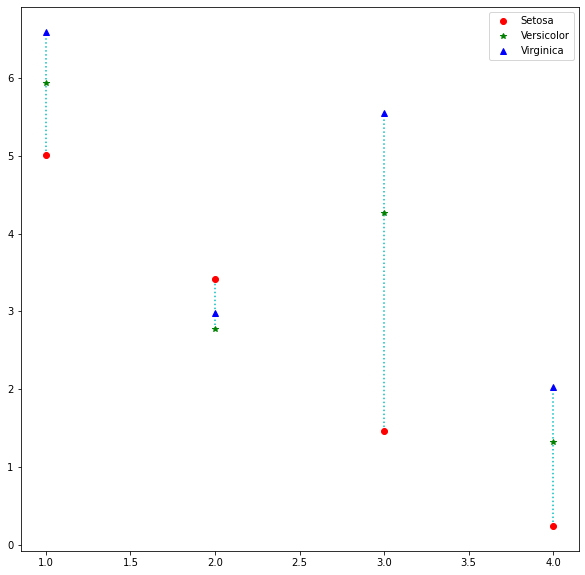

In [27]:
plt.plot([1,1],[min(sample_data.iloc[:,0]),max(sample_data.iloc[:,0])],'c:')
plt.plot([2,2],[min(sample_data.iloc[:,1]),max(sample_data.iloc[:,1])],'c:')
plt.plot([3,3],[min(sample_data.iloc[:,2]),max(sample_data.iloc[:,2])],'c:')
plt.plot([4,4],[min(sample_data.iloc[:,3]),max(sample_data.iloc[:,3])],'c:')

plt.plot([1,2,3,4],sample_data.iloc[0,:],'ro',label='Setosa')
plt.plot([1,2,3,4],sample_data.iloc[1,:],'g*',label='Versicolor')
plt.plot([1,2,3,4],sample_data.iloc[2,:],'b^',label='Virginica')
plt.legend()

In [28]:
example_df.iloc[:,:-1].columns.tolist()

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

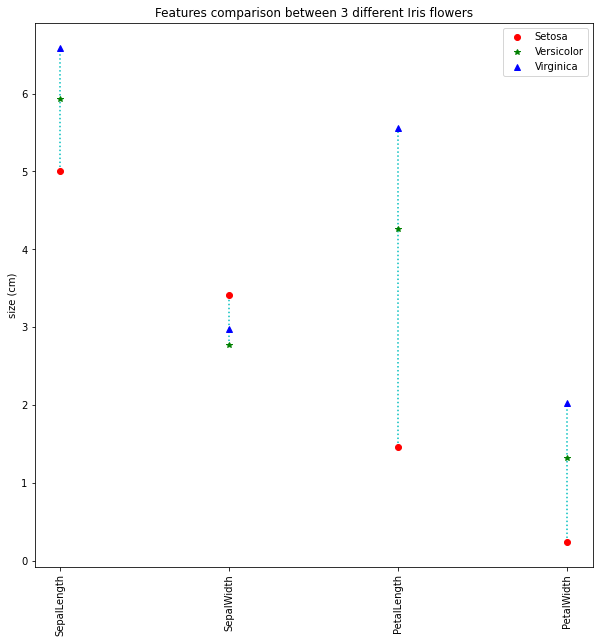

In [29]:
plt.plot([1,1],[min(sample_data.iloc[:,0]),max(sample_data.iloc[:,0])],'c:')
plt.plot([2,2],[min(sample_data.iloc[:,1]),max(sample_data.iloc[:,1])],'c:')
plt.plot([3,3],[min(sample_data.iloc[:,2]),max(sample_data.iloc[:,2])],'c:')
plt.plot([4,4],[min(sample_data.iloc[:,3]),max(sample_data.iloc[:,3])],'c:')

plt.plot([1,2,3,4],sample_data.iloc[0,:],'ro',label='Setosa')
plt.plot([1,2,3,4],sample_data.iloc[1,:],'g*',label='Versicolor')
plt.plot([1,2,3,4],sample_data.iloc[2,:],'b^',label='Virginica')
plt.legend()
plt.xticks([1,2,3,4], example_df.iloc[:,:-1].columns.tolist(), rotation='vertical')
plt.title('Features comparison between 3 different Iris flowers');
plt.ylabel('size (cm)');

#HW4 วาดรูป ก้อนเมฆ และ ฝน ด้วย plt.plot พร้อมทั้งเขียนคำว่า Rain ลงในรูปด้วย

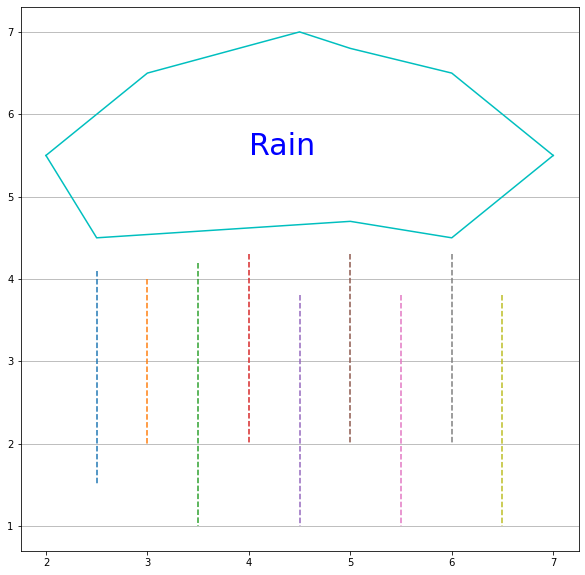

In [30]:
#ก้อนเมฆ
plt.plot([2,2.5,5,6,7],[5.5,4.5,4.7,4.5,5.5],'c-')
plt.plot([2,2.5,3,4.5,5,6,7],[5.5,6,6.5,7,6.8,6.5,5.5],'c-')
#ฝน
plt.plot([2.5,2.5],[4.1,1.5],'--')
plt.plot([3,3],[4,2],'--')
plt.plot([3.5,3.5],[4.2,1],'--')
plt.plot([4,4],[4.3,2],'--')
plt.plot([4.5,4.5],[3.8,1],'--')
plt.plot([5,5],[4.3,2],'--')
plt.plot([5.5,5.5],[3.8,1],'--')
plt.plot([6,6],[4.3,2],'--')
plt.plot([6.5,6.5],[3.8,1],'--')

plt.text(4,5.5,'Rain',fontsize=30, color='b')
plt.grid(True,axis='y')


#Bar Chart

In [31]:
sample_data

,SepalLength,SepalWidth,PetalLength,PetalWidth
Name,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [32]:
sample_data['PetalLength']

Name
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: PetalLength, dtype: float64

In [33]:
sample_data['PetalLength'][0]

1.464

เปรียบเทียบปริมาณ 1 ปริมาณของ object หลาย class

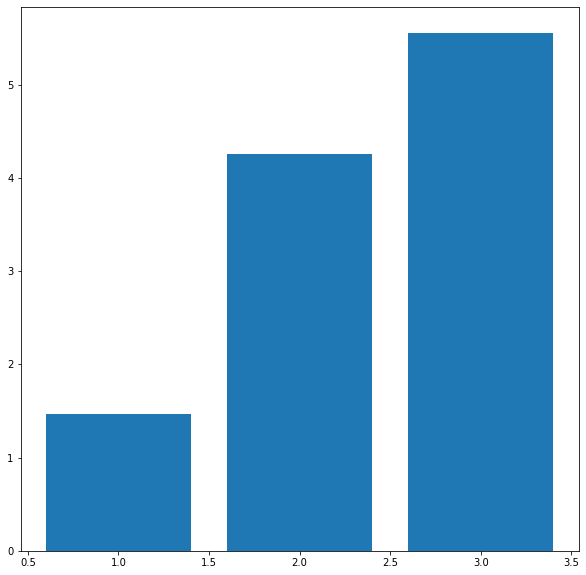

In [34]:
plt.bar([1,2,3],sample_data['PetalLength']); # (ค่าในแนวแกน X, ความสูงของกราฟแท่ง)

In [35]:
sample_data.reset_index()

,Name,SepalLength,SepalWidth,PetalLength,PetalWidth
0,Iris-setosa,5.006,3.418,1.464,0.244
1,Iris-versicolor,5.936,2.770,4.260,1.326
2,Iris-virginica,6.588,2.974,5.552,2.026


In [36]:
sample_data.reset_index()['Name']

0        Iris-setosa
1    Iris-versicolor
2     Iris-virginica
Name: Name, dtype: object

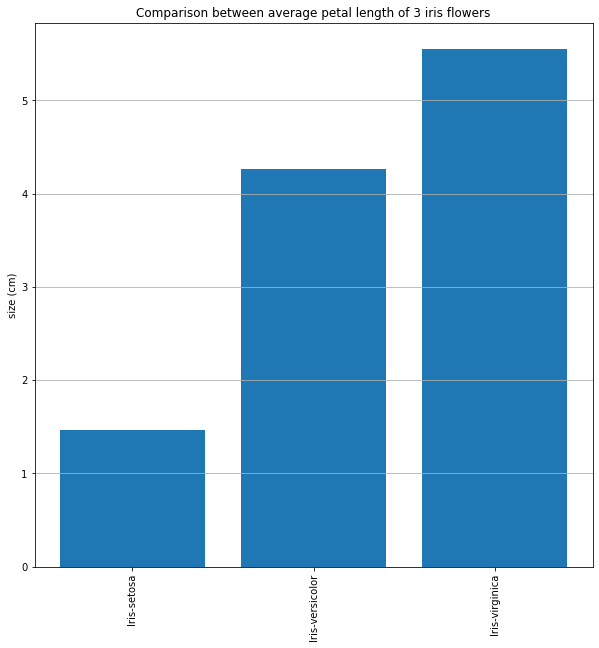

In [37]:
plt.bar([1,2,3],sample_data['PetalLength'])
plt.xticks([1,2,3], sample_data.reset_index()['Name'], rotation='vertical')
plt.title('Comparison between average petal length of 3 iris flowers')
plt.grid(True,axis='y')
plt.ylabel('size (cm)');

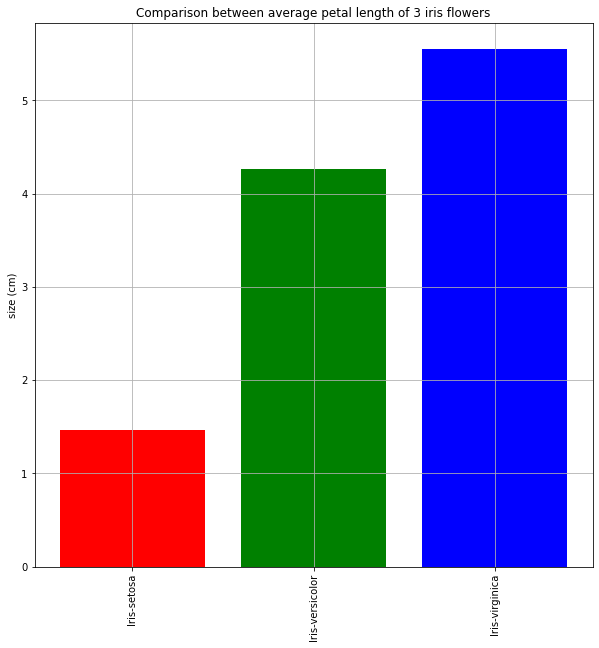

In [38]:
plt.bar([1,2,3],sample_data['PetalLength'],color=['r','g','b'])
plt.xticks([1,2,3], sample_data.reset_index()['Name'], rotation='vertical')
plt.title('Comparison between average petal length of 3 iris flowers')
plt.grid(True)
plt.ylabel('size (cm)');

#เปรียบเทียบปริมาณ มากกว่า 1 ปริมาณของ object หลาย class

In [39]:
import numpy as np

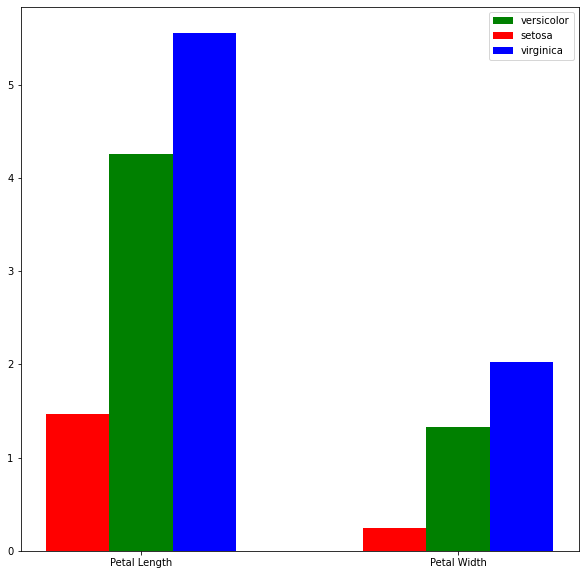

In [40]:
width = 0.2 #กำหนดความกว้างเเท่ง

plt.bar([1, 2],[sample_data['PetalLength'][1],sample_data['PetalWidth'][1]],width,color='g',label='versicolor') #ดอกที่ 2 versicolor
plt.bar([1-width, 2-width],[sample_data['PetalLength'][0],sample_data['PetalWidth'][0]],width,color='r',label='setosa') #ดอกที่ 1 setosa ขยับซ้าย
plt.bar([1+width, 2+width],[sample_data['PetalLength'][2],sample_data['PetalWidth'][2]],width,color='b',label='virginica') #ดอกที่ 1 setosa ขยับซ้าย

plt.xticks([1,2], ['Petal Length','Petal Width'])
plt.legend();

# Quiz 7
plot barchart เปรียบเทียบ  feature ทั้ง 4 ของดอกไม้เเต่ละชนิด

In [41]:
import pandas as pd

In [42]:
import numpy as np

In [43]:
from matplotlib import pyplot as plt

In [44]:
sample_data = example_df.groupby('Name').mean()

In [45]:
sample_data2=sample_data.transpose()

In [46]:
sample_data2

Name,Iris-setosa,Iris-versicolor,Iris-virginica
SepalLength,5.006,5.936,6.588
SepalWidth,3.418,2.770,2.974
PetalLength,1.464,4.260,5.552
PetalWidth,0.244,1.326,2.026


Text(0.5, 1.0, 'Compare the differences between the three types of flowers.')

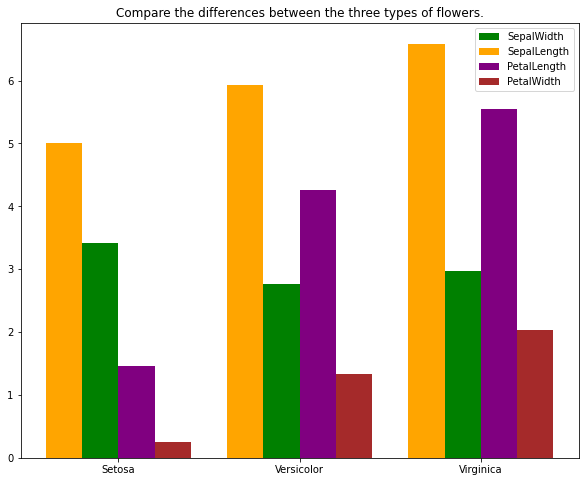

In [47]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10,8]

width = 0.2 #กำหนดความกว้างของแท่ง 

plt.bar([0.9, 1.9, 2.9],[sample_data2['Iris-setosa'][1],sample_data2['Iris-versicolor'][1],sample_data2['Iris-virginica'][1]],width,color='green',label='SepalWidth') 
plt.bar([0.9-width, 1.9-width, 2.9-width],[sample_data2['Iris-setosa'][0],sample_data2['Iris-versicolor'][0],sample_data2['Iris-virginica'][0]],width,color='orange',label='SepalLength')
plt.bar([1.1, 2.1, 3.1],[sample_data2['Iris-setosa'][2],sample_data2['Iris-versicolor'][2],sample_data2['Iris-virginica'][2]],width,color='purple',label='PetalLength')
plt.bar([1.1+width, 2.1+width, 3.1+width],[sample_data2['Iris-setosa'][3],sample_data2['Iris-versicolor'][3],sample_data2['Iris-virginica'][3]],width,color='brown',label='PetalWidth')

plt.xticks([1,2,3], ['Setosa','Versicolor','Virginica'])
plt.legend();
plt.title('Compare the differences between the three types of flowers.')


#การนำปริมาณหลายปริมาณมาซ้อนกัน

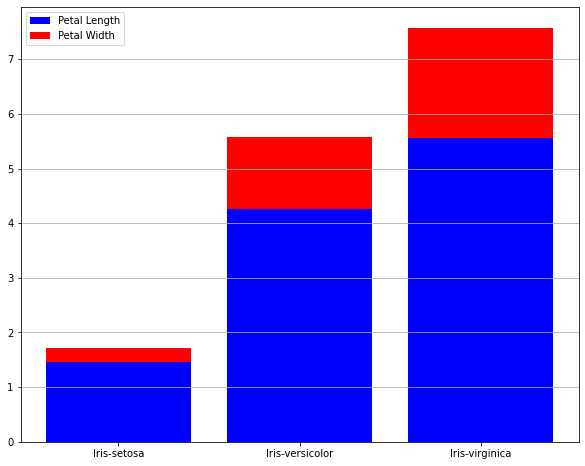

In [48]:
plt.bar([1,2,3],sample_data['PetalLength'],color='b',label='Petal Length')
plt.bar([1,2,3],sample_data['PetalWidth'],bottom=sample_data['PetalLength'],color='r',label='Petal Width')#bottom=sample_data['PetalLength'] กำหนดฐาน
plt.xticks([1,2,3], sample_data.reset_index()['Name'])
plt.grid(True,axis='y')
plt.legend();

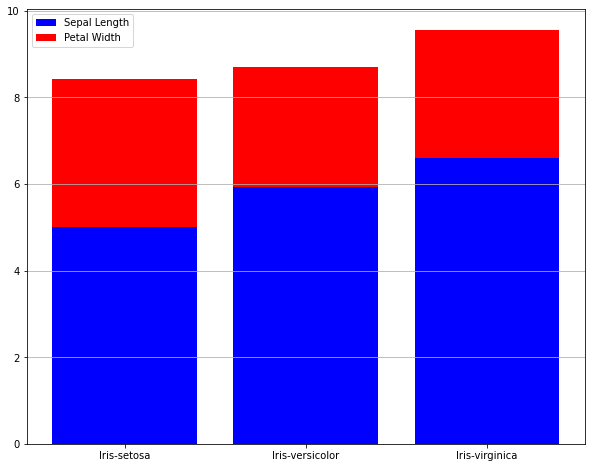

In [49]:
plt.bar([1,2,3],sample_data['SepalLength'],color='b',label='Sepal Length')
plt.bar([1,2,3],sample_data['SepalWidth'],bottom=sample_data['SepalLength'],color='r',label='Petal Width')#bottom=sample_data['PetalLength'] กำหนดฐาน
plt.xticks([1,2,3], sample_data.reset_index()['Name'])
plt.grid(True,axis='y')
plt.legend();

Bar chart แบบ ตะแคงข้าง

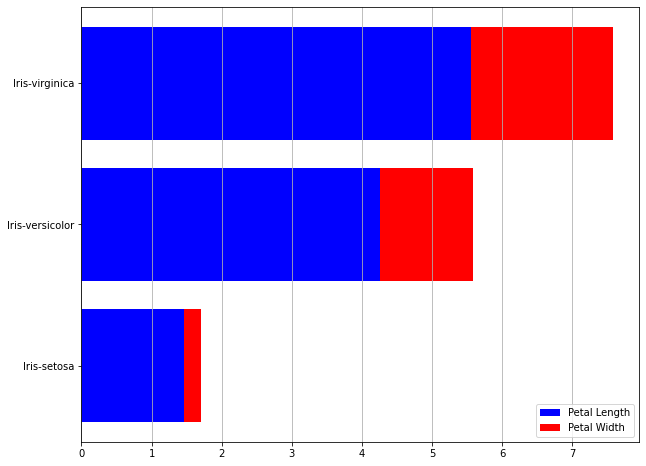

In [50]:
plt.barh([1,2,3],sample_data['PetalLength'],color='b',label='Petal Length')
plt.barh([1,2,3],sample_data['PetalWidth'],left=sample_data['PetalLength'],color='r',label='Petal Width')#left=sample_data['PetalLength']
plt.yticks([1,2,3], sample_data.reset_index()['Name'])
plt.grid(True,axis='x')
plt.legend();

เพิ่มปริมาณที่ 3

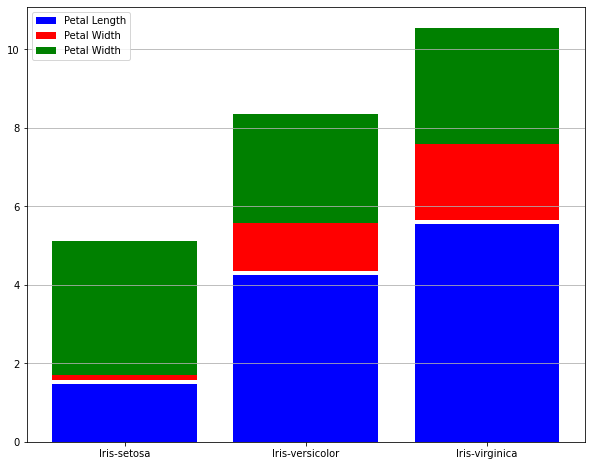

In [51]:
plt.bar([1,2,3],sample_data['PetalLength'],color='b',label='Petal Length')
plt.bar([1,2,3],sample_data['PetalWidth'],bottom=sample_data['PetalLength']+0.1,color='r',label='Petal Width')#bottom=sample_data['PetalLength'] กำหนดฐาน
plt.bar([1,2,3],sample_data['SepalWidth'],bottom=sample_data['PetalWidth']+sample_data['PetalLength'],color='g',label='Petal Width')
plt.xticks([1,2,3], sample_data.reset_index()['Name'])
plt.grid(True,axis='y')
plt.legend();

#Histogram

In [52]:
np.random.seed(2022)

X = np.random.randint(1,101,10000)

In [53]:
X

array([93, 46, 50, ..., 64,  7, 46])

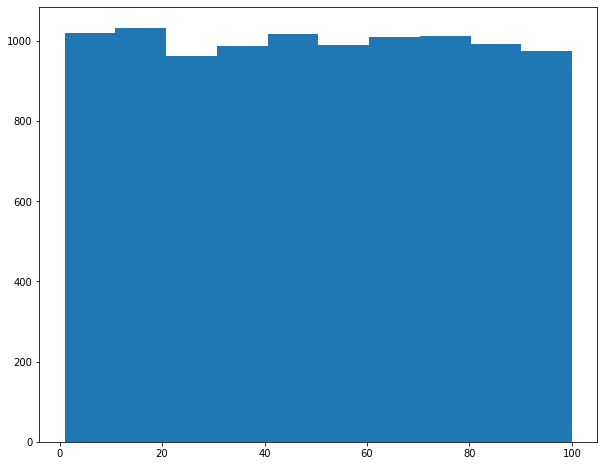

In [54]:
histout = plt.hist(X)

In [55]:
histout

(array([1020., 1033.,  963.,  988., 1018.,  990., 1010., 1012.,  992.,
         974.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

In [56]:
histout[0]

array([1020., 1033.,  963.,  988., 1018.,  990., 1010., 1012.,  992.,
        974.])

In [57]:
histout[1]

array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
        90.1, 100. ])

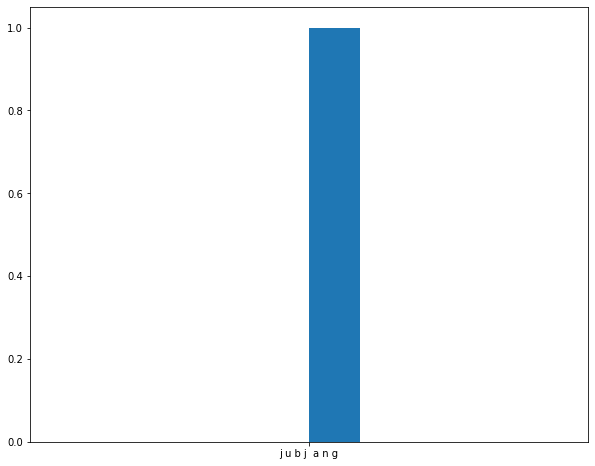

In [58]:
histout2 = plt.hist('j u b j  a n g')

In [59]:
histout2

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

#Tree map

In [60]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import matplotlib.pyplot as plt
import squarify

In [62]:
data = [500, 250, 60, 120]

(0.0, 100.0, 0.0, 100.0)

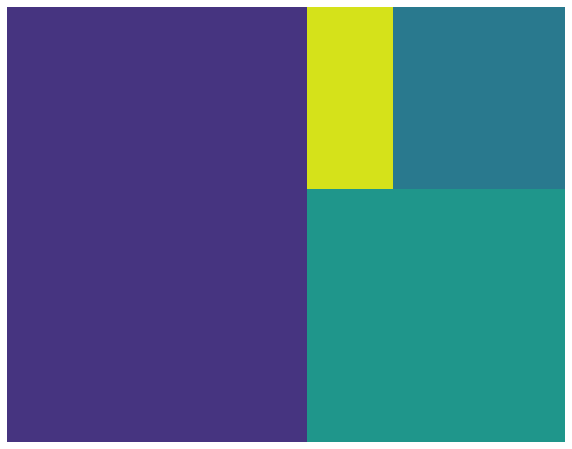

In [63]:
squarify.plot(data)
plt.axis('off')

ตั้งสี ที่ต้องการ

(0.0, 100.0, 0.0, 100.0)

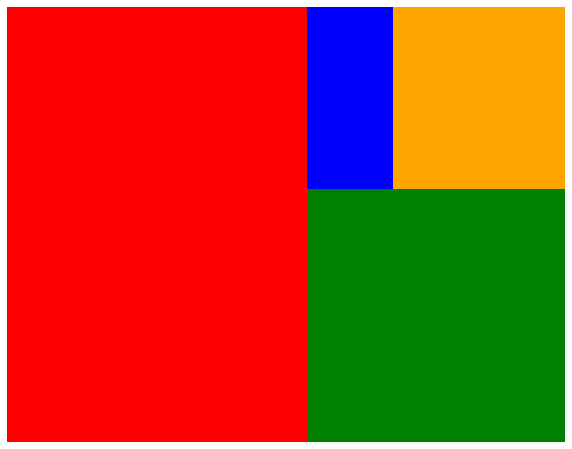

In [64]:
data = [500, 250, 60, 120]
color = ['red', 'green', 'blue', 'orange']
squarify.plot(data,color=color)
plt.axis('off')

เพิ่มชื่อให้กับปริมาณแต่ละตัว

(0.0, 100.0, 0.0, 100.0)

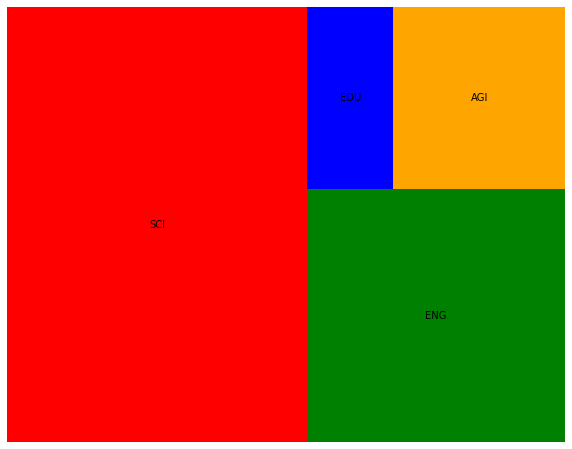

In [65]:
labels = ['SCI', 'ENG', 'EDU', 'AGI']
data = [500, 250, 60, 120]
color = ['red', 'green', 'blue', 'orange']
squarify.plot(data,color=color,label = labels)
plt.axis('off')

(0.0, 100.0, 0.0, 100.0)

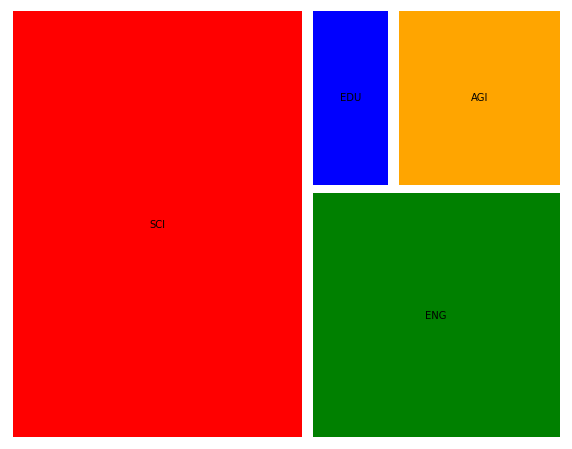

In [66]:
labels = ['SCI', 'ENG', 'EDU', 'AGI']
data = [500, 250, 60, 120]
color = ['red', 'green', 'blue', 'orange']
squarify.plot(data,color=color,label = labels,pad=True)
plt.axis('off')

#Spyder (Radar) Chart

In [67]:
import numpy as np
import pandas as pd  #import pandas มาเพราะข้อมูลจะเกี่ยวกับตาราง

import matplotlib.pyplot as plt
from math import pi #import math มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [68]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
         'Math' : [10,5,4,7],
         'Eng' : [7,1,3,5],
         'Friendly' : [4,8,10,4],
        'Look' : [4,8,7,6],
       'Money' : [2,10,5,9]}
df = pd.DataFrame.from_dict(data)
df

,client_id,Math,Eng,Friendly,Look,Money
0,c1,10,7,4,4,2
1,c2,5,1,8,8,10
2,c3,4,3,10,7,5
3,c4,7,5,4,6,9


In [69]:
categories = list(df.columns[1:])
categories

['Math', 'Eng', 'Friendly', 'Look', 'Money']

plot ค่า mean

In [76]:
values = df.mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


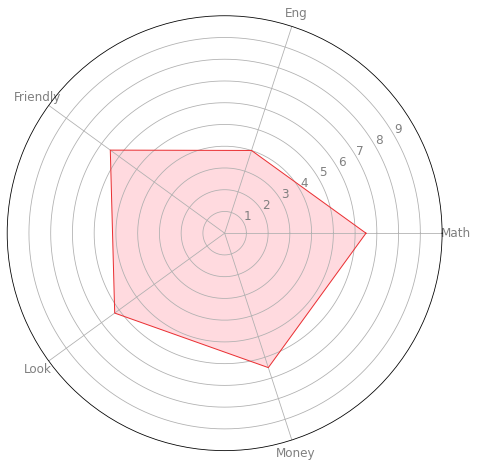

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 10), ['1', '2', '3', '4', '5','6','7','8','9','10'],
           color='grey', size=12)

plt.ylim(0, 10)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid' , color = '#ea3033') #เส้นกราฟ
ax.fill(angles, values, 'lightpink', alpha=0.5) #พื้นที่

Plot แต่ละคน

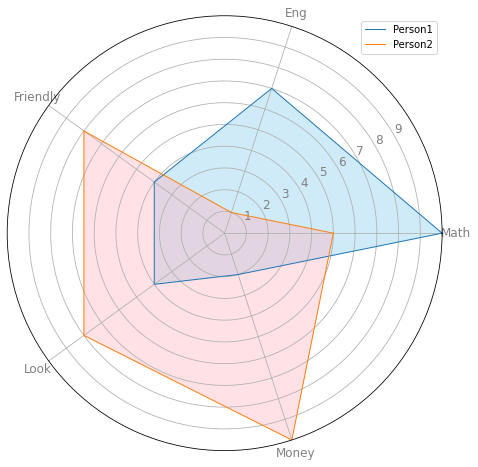

In [78]:
# คำนวณมุมของแต่ละคุณสมบัติ
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))] ## เปลี่ยน len(categories) เป็นจำนวนคุณสมบัติที่จะ plot
angles += angles[:1]

# สร้าง background graph
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 10), ['1', '2', '3', '4', '5','6','7','8','9','10'],    ## กำหนด scale ของค่าที่ต้องการแสดง
           color='grey', size=12)

plt.ylim(0, 10)
ax.set_rlabel_position(30)

# plot คนที่ 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()    ## เลือกค่าที่ต้องการแสดง
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Person1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)     ## เลือกสี

# plot คนที่ 2
val_c2 = df.loc[1].drop('client_id').values.flatten().tolist()   ## เลือกค่าที่ต้องการแสดง
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='Person2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)   ## เลือกสี

ax.legend();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


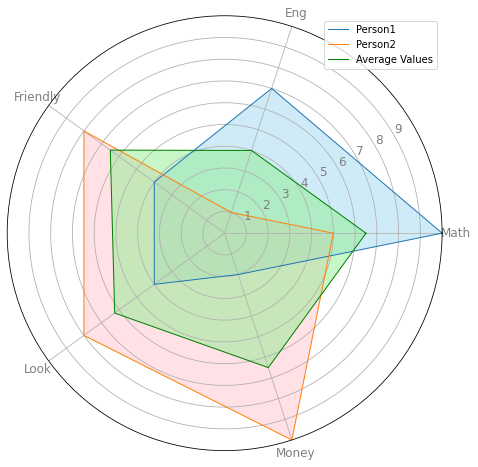

In [73]:
# คำนวณมุมของแต่ละคุณสมบัติ
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))] ## เปลี่ยน len(categories) เป็นจำนวนคุณสมบัติที่จะ plot
angles += angles[:1]

# สร้าง background graph
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 10), ['1', '2', '3', '4', '5','6','7','8','9','10'],    ## กำหนด scale ของค่าที่ต้องการแสดง
           color='grey', size=12)

plt.ylim(0, 10)
ax.set_rlabel_position(30)

# plot คนที่ 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()    ## เลือกค่าที่ต้องการแสดง
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Person1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)     ## เลือกสี

# plot คนที่ 2
val_c2 = df.loc[1].drop('client_id').values.flatten().tolist()   ## เลือกค่าที่ต้องการแสดง
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='Person2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)   ## เลือกสี

# plot ค่าเฉลี่ย
values = df.mean().values.flatten().tolist()    ## เลือกค่าที่ต้องการแสดง
values += values[:1] 
ax.plot(angles, values, linewidth=1, linestyle='solid' , color = 'g', label='Average Values') 
ax.fill(angles, values, 'lightgreen', alpha=0.5)    ## เลือกสี

ax.legend();

In [74]:
angles

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669,
 0.0]

In [75]:
val_c1

[10, 7, 4, 4, 2, 10]

In [79]:
from google.colab import drive
drive.mount('/content/drive')

eat = pd.read_csv('/content/drive/MyDrive/BPDV65/opendata_eating_score.csv')
eat.head()

Mounted at /content/drive


,row_number,subdistrict_id,subdistrict_name_en,subdistrict_name_th,district_id,district_name_en,district_name_th,province_id,province_name_en,province_name_th,eating_daytime,eating_daytime_price,eating_daytime_quality,eating_daytime_variety,eating_nighttime,eating_nighttime_price,eating_nighttime_quality,eating_nighttime_variety,source,day
0,2,4001,HUAI KHWANG,ห้วยขวาง,4000,HUAI KHWANG,ห้วยขวาง,3781,Bangkok,กรุงเทพมหานคร,66.0,72.0,49.0,92.0,75.0,68.0,54.0,94.0,baania,2022-08-31
1,397,2632,THEP KRASATTRI,เทพกระษัตรี,2630,THALANG,ถลาง,2616,Phuket,ภูเก็ต,35.0,37.0,30.0,45.0,38.0,28.0,28.0,51.0,baania,2022-08-31
2,76,3509,PAK NAM,ปากน้ำ,3499,MUEANG SAMUT PRAKAN,เมืองสมุทรปราการ,3498,Samut Prakan,สมุทรปราการ,70.0,84.0,55.0,79.0,65.0,72.0,57.0,67.0,baania,2022-08-31
3,368,4628,SAMET,เสม็ด,4617,MUEANG CHON BURI,เมืองชลบุรี,4616,Chon Buri,ชลบุรี,68.0,67.0,56.0,97.0,69.0,41.0,54.0,94.0,baania,2022-08-31
4,531,1166,TON PAO,ต้นเปา,1164,SAN KAMPHAENG,สันกำแพง,1005,Chiang Mai,เชียงใหม่,44.0,36.0,47.0,51.0,47.0,22.0,61.0,52.0,baania,2022-08-31


In [80]:
set(eat['district_name_en'])

{'BAN BUENG',
 'BAN CHANG',
 'BAN KHAI',
 'BAN PHAEO',
 'BANG BO',
 'BANG BON',
 'BANG BUA THONG',
 'BANG KAPI',
 'BANG KHAE',
 'BANG KHEN',
 'BANG KHO LAEM',
 'BANG KHUN THIAN',
 'BANG KRUAI',
 'BANG LAMUNG',
 'BANG LEN',
 'BANG NA',
 'BANG PHLAT',
 'BANG PHLI',
 'BANG RAK',
 'BANG SAO THONG',
 'BANG SUE',
 'BANG YAI',
 'BANGKOK NOI',
 'BANGKOK YAI',
 'BO THONG',
 'BUENG KUM',
 'CHATUCHAK',
 'CHOM THONG',
 'DIN DAENG',
 'DOI SAKET',
 'DON MUEANG',
 'DON TUM',
 'DUSIT',
 'HANG DONG',
 'HUAI KHWANG',
 'KAMPHAENG SAEN',
 'KATHU',
 'KHAN NA YAO',
 'KHLONG LUANG',
 'KHLONG SAM WA',
 'KHLONG SAN',
 'KHLONG TOEI',
 'KLAENG',
 'KO CHAN',
 'KRATHUM BAEN',
 'LAK SI',
 'LAM LUK KA',
 'LAT KRABANG',
 'LAT LUM KAEO',
 'LAT PHRAO',
 'MAE RIM',
 'MIN BURI',
 'MUEANG CHIANG MAI',
 'MUEANG CHON BURI',
 'MUEANG NAKHON PATHOM',
 'MUEANG NONTHABURI',
 'MUEANG PATHUM THANI',
 'MUEANG PHUKET',
 'MUEANG RAYONG',
 'MUEANG SAMUT PRAKAN',
 'MUEANG SAMUT SAKHON',
 'NAKHON CHAI SI',
 'NIKHOM PHATTHANA',
 'NONG C

In [81]:
mydata = eat[(eat['district_name_en']=='MUEANG PHUKET') | (eat['district_name_en']=='MUEANG CHON BURI')].groupby('district_name_en').mean()

In [82]:
import numpy as np

In [83]:
mydata

,row_number,subdistrict_id,district_id,province_id,eating_daytime,eating_daytime_price,eating_daytime_quality,eating_daytime_variety,eating_nighttime,eating_nighttime_price,eating_nighttime_quality,eating_nighttime_variety
district_name_en,,,,,,,,,,,,
MUEANG CHON BURI,241.533333,4627.133333,4617.0,4616.0,56.600,60.6,49.133333,66.266667,52.333333,34.666667,43.80,68.00
MUEANG PHUKET,288.375000,2621.500000,2617.0,2616.0,56.125,65.5,46.000000,63.500000,56.000000,57.375000,42.25,64.25


In [84]:
mydata = mydata.reset_index()[['eating_daytime_price','eating_nighttime_price','eating_daytime_quality','eating_nighttime_quality','eating_daytime_variety','eating_nighttime_variety']]

In [85]:
mydata['eating_nighttime_price'] = 100-np.array(mydata['eating_nighttime_price'])
mydata['eating_daytime_price'] = 100-np.array(mydata['eating_daytime_price'])

In [86]:
mydata = 0.1*mydata
mydata

,eating_daytime_price,eating_nighttime_price,eating_daytime_quality,eating_nighttime_quality,eating_daytime_variety,eating_nighttime_variety
0,3.94,6.533333,4.913333,4.380,6.626667,6.800
1,3.45,4.262500,4.600000,4.225,6.350000,6.425


In [87]:
categories = ['eating_daytime_price','eating_nighttime_price','eating_daytime_quality','eating_nighttime_quality','eating_daytime_variety','eating_nighttime_variety']

In [88]:
mydata.loc[0].values.flatten().tolist()

[3.94,
 6.533333333333335,
 4.913333333333334,
 4.38,
 6.626666666666667,
 6.800000000000001]

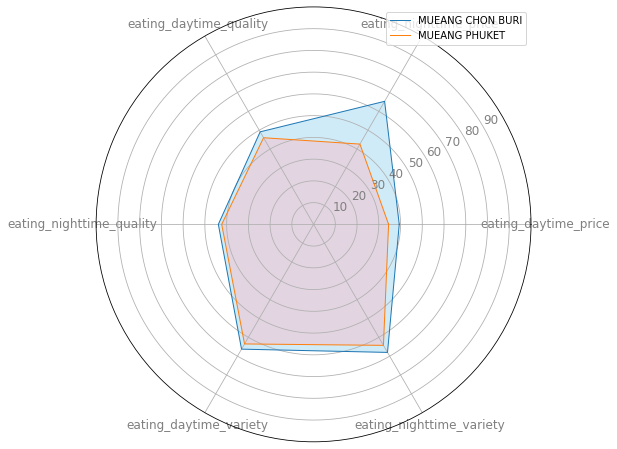

In [89]:
# คำนวณมุมของแต่ละคุณสมบัติ
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))] ## เปลี่ยน len(categories) เป็นจำนวนคุณสมบัติที่จะ plot
angles += angles[:1]

# สร้าง background graph
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 10), ['10', '20', '30', '40', '50','60','70','80','90','100'],    ## กำหนด scale ของค่าที่ต้องการแสดง
           color='grey', size=12)

plt.ylim(0, 10)
ax.set_rlabel_position(30)

# plot คนที่ 1
val_c1 = mydata.loc[0].values.flatten().tolist()    ## เลือกค่าที่ต้องการแสดง
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='MUEANG CHON BURI')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)     ## เลือกสี

# plot คนที่ 2
val_c2 = mydata.loc[1].values.flatten().tolist()   ## เลือกค่าที่ต้องการแสดง
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='MUEANG PHUKET')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)   ## เลือกสี

ax.legend();

#Word cloud

In [90]:
from wordcloud import WordCloud, STOPWORDS

In [91]:
allwords = "กงเกวียนกำเกวียน หมายถึง ทำอะไรกับใครไว้ ย่อมได้รับผลกรรมนั้น \
กบในกะลาครอบ หมายถึง มีความรู้หรือประสบการณ์น้อย แต่นึกว่าตัวเองรู้มาก \
กรวดน้ำคว่ำขัน (คว่ำกะลา) หมายถึง ตัดขาดไม่เกี่ยวข้องด้วย ชาตินี้อย่าได้เจอกัน \
กระเชอก้นรั่ว หมายถึง ใช้จ่ายเงินสุรุ่ยสุร่าย ไม่ประหยัด ไม่เก็บหอมรอมริบ \
กระดี่ได้น้ำ หมายถึง ดีอกดีใจจนเกินงาม เนื้อตัวสั่น \
กระต่ายขาเดียว หมายถึง ยืนกรานไม่ยอมรับผิด \
กระต่ายตื่นตูม หมายถึง ตื่นตกใจง่าย ยังไม่ทันหาสาเหตุให้ชัดเจนเสียก่อนก็โวยวายแล้ว \
กระต่ายหมายจันทร์ หมายถึง ผู้ชายที่หมายปองหญิงสูงศักดิ์ ฐานะดีกว่าตัวเอง \
กระโถนท้องพระโรง หมายถึง บุคคลที่ถูกใคร ๆ รุมใช้อยู่คนเดียว \
กลับเนื้อกลับตัว หมายถึง เลิกทำความชั่ว แล้วมาประพฤติตัวเป็นคนดี \
กลับหน้ามือเป็นหลังมือ หมายถึง เปลี่ยนแปลงจากเดิมไปอย่างตรงกันข้าม \
กล้านักมักบิ่น หมายถึง กล้าเกินไปมักจะเกิดอันตรายได้ \
กว่าถั่วจะสุกงาก็ไหม้ หมายถึง ทำงาน 2 อย่าง แบบลังเลใจ แก้ปัญหาไม่ทันท่วงทีต้องเสียงานไป 1 อย่าง \
ก่อร่างสร้างตัว หมายถึง ทำงานหาเงินเป็นกอบเป็นกำ ตั้งเนื้อตั้งตัวได้เป็นหลักฐาน \
กาคาบพริก หมายถึง คนผิวดำที่ชอบแต่งตัวด้วยเสื้อผ้าสีแดง ๆ หรือสีสด ๆ \
กำขี้ดีกว่ากำตด หมายถึง ได้มาบ้างดีกว่าไม่ได้อะไรเลย \
กำแพงมีหูประตูมีช่อง / กำแพงมีหู หมายถึง ประตูมีตา จะพูดอะไรต้องระวัง อาจมีคนรู้ได้ \
กิ่งทองใบหยก หมายถึง ชายหนุ่ม หญิงสาวเหมาะสมกันดีที่จะแต่งงาน \
กินที่ลับไขที่แจ้ง หมายถึง เอาความลับหรือเอาเรื่องที่ทำกันที่ลับมาเปิดเผยให้คนเขารู้ \
กินน้ำใต้ศอก หมายถึง เมียน้อยต้องยอมรับของเหลือจากเมียหลวง ตกเป็นรองด้านศักดิ์ศรี \
กินน้ำพริกถ้วยเก่า หมายถึง อยู่กับเมียคนเดิม \
กินน้ำไม่เผื่อแล้ง หมายถึง มีเงิน มีของก็ใช้จนหมด ไม่ห่วงอนาคตข้างหน้า \
กินน้ำเห็นปลิง หมายถึง ตะขิดตะขวงใจกับคนชั่วที่รู้พูดหรือคบด้วยโดยรู้ว่าเขาไม่ดี \
กินบนเรือนขี้บนหลังคา หมายถึง คนเนรคุณอาศัยบ้านเขาหรือเขาให้ความช่วยเหลือแต่กลับทำความไม่ดีห้ \
เก็บเบี้ยใต้ถุนร้าน หมายถึง เก็บเล็กผสมน้อย เก็บส่วนเล็กส่วนน้อยจนเป็นรูปเป็นร่างเป็นกอบเป็นกำ \
เกลือจิ้มเกลือ หมายถึง แก้แค้นให้สาสมกับที่ทำไว้ ไม่ยอมเสียเปรียบกัน\
เกลือเป็นหนอน หมายถึง คนภายในกลุ่มของเรา คิดทรยศไปบอกความลับฝ่ายตรงข้าม \
เกี่ยวแฝกมุงป่า หมายถึง ทำอะไรเกินกำลังความสามารถของตัว \
แกว่งเท้าหาเสี้ยน หมายถึง อยู่ดีไม่ว่าดี ไปหาเรื่องเดือดร้อนใส่ตัว \
ไก่แก่แม่ปลาช่อน หมายถึง หญิงมีอายุมาก มีมารยามาก เล่ห์เหลี่ยมมาก \
ไกลปืนเที่ยง หมายถึง ไม่ค่อยรู้ความเป็นไปของโลก เพราะอยู่ห่างไกลความเจริญ \
ไก่เห็นตีนงู งูเห็นนมไก่ หมายถึง ต่างฝ่ายต่างรู้ความลับของกันและกัน"

In [ ]:
!pip